In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras.applications.vgg16 import VGG16

In [3]:
PATH='D://kaggle-genki4k/'

In [4]:
train=os.path.join(PATH, 'train')

In [5]:
train

'D://kaggle-genki4k/train'

In [4]:
test=os.path.join(PATH, 'test')

In [5]:
validation=os.path.join(PATH, 'validation')

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train,
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=(160,160))

Found 2752 files belonging to 2 classes.


In [7]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test,
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=(160,160))

Found 660 files belonging to 2 classes.


In [8]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation,
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=(160,160))

Found 588 files belonging to 2 classes.


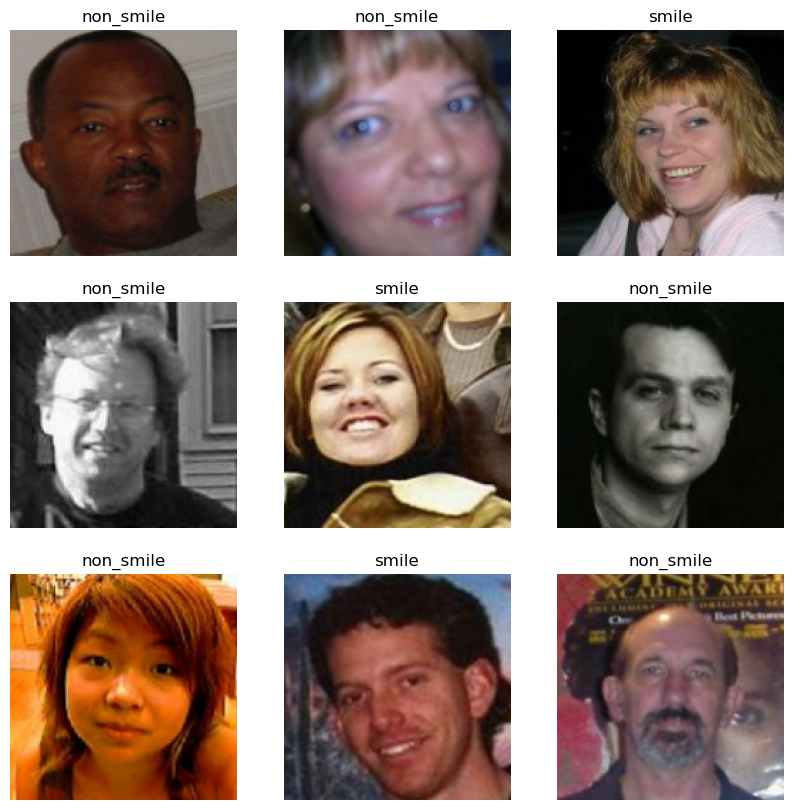

In [9]:
class_names = validation_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in validation_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

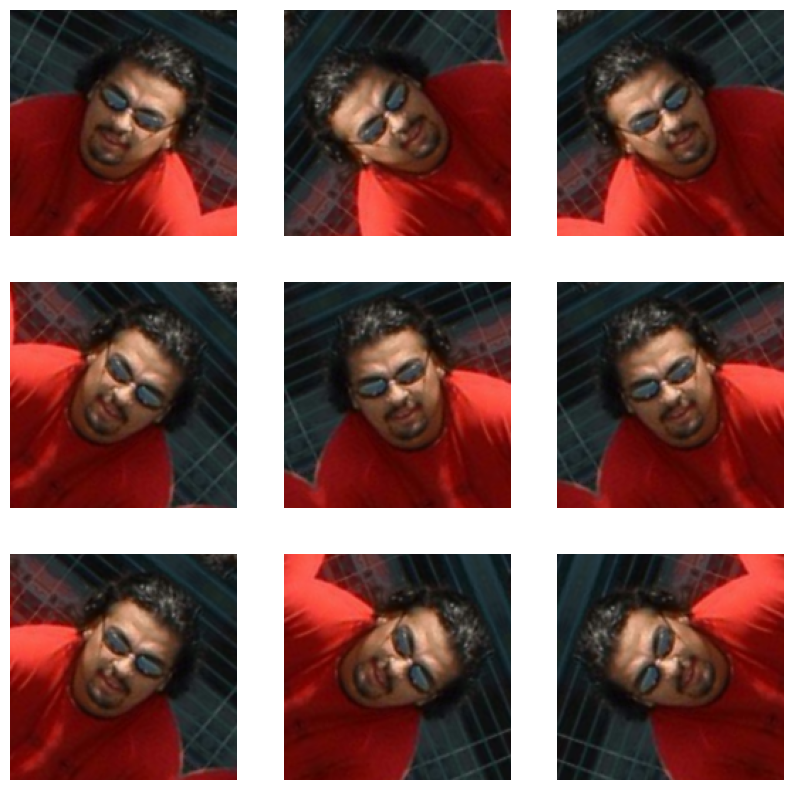

In [10]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image =augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [11]:
preprocessing_1=tf.keras.applications.vgg16.preprocess_input

In [ ]:
preprocessing=tf.keras.applications.mobilenet_v2.preprocess_input

In [12]:
base_model_1=VGG16(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model=tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')

In [16]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

In [13]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [14]:
prediction_layer = tf.keras.layers.Dense(1)

In [15]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x=augmentation(inputs)
x=preprocessing(x)
x = base_model(x, training=False)
x=global_average_layer(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history=model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
86/86 [==============================] - 463s 5s/step - loss: 2.9170 - accuracy: 0.4757 - val_loss: 0.6928 - val_accuracy: 0.4490
Epoch 2/10
86/86 [==============================] - 457s 5s/step - loss: 0.6930 - accuracy: 0.4804 - val_loss: 0.6919 - val_accuracy: 0.4490
Epoch 3/10
86/86 [==============================] - 458s 5s/step - loss: 0.7118 - accuracy: 0.4880 - val_loss: 0.6919 - val_accuracy: 0.4490
Epoch 4/10
86/86 [==============================] - 461s 5s/step - loss: 0.6928 - accuracy: 0.4804 - val_loss: 0.6914 - val_accuracy: 0.4490
Epoch 5/10
86/86 [==============================] - 459s 5s/step - loss: 0.6928 - accuracy: 0.4804 - val_loss: 0.6913 - val_accuracy: 0.4490
Epoch 6/10
86/86 [==============================] - 460s 5s/step - loss: 0.6927 - accuracy: 0.4804 - val_loss: 0.6912 - val_accuracy: 0.4490
Epoch 7/10
57/86 [==================>...........] - ETA: 2:29 - loss: 0.6927 - accuracy: 0.4803

KeyboardInterrupt: 

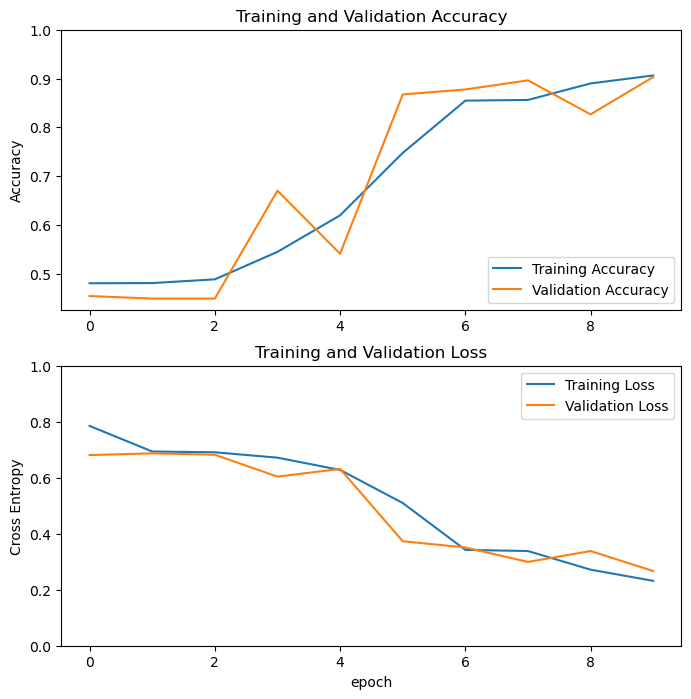

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [58]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

21/21 [==============================] - 5s 215ms/step - loss: 0.2993 - accuracy: 0.9167
Test accuracy : 0.9166666865348816


In [59]:
base_model.trainable = True

In [61]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001/10),
              metrics=['accuracy'])

In [62]:
total_epochs =  20

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
86/86 [==============================] - 79s 838ms/step - loss: 0.0921 - accuracy: 0.9626 - val_loss: 0.3611 - val_accuracy: 0.8946
Epoch 11/20
86/86 [==============================] - 71s 830ms/step - loss: 0.0713 - accuracy: 0.9746 - val_loss: 0.3940 - val_accuracy: 0.8929
Epoch 12/20
86/86 [==============================] - 71s 828ms/step - loss: 0.0699 - accuracy: 0.9771 - val_loss: 0.3934 - val_accuracy: 0.8997
Epoch 13/20
86/86 [==============================] - 71s 830ms/step - loss: 0.0731 - accuracy: 0.9753 - val_loss: 0.3729 - val_accuracy: 0.8997
Epoch 14/20
86/86 [==============================] - 71s 830ms/step - loss: 0.0685 - accuracy: 0.9749 - val_loss: 0.3834 - val_accuracy: 0.9031
Epoch 15/20
86/86 [==============================] - 71s 831ms/step - loss: 0.0549 - accuracy: 0.9786 - val_loss: 0.4092 - val_accuracy: 0.8946
Epoch 16/20
86/86 [==============================] - 72s 832ms/step - loss: 0.0556 - accuracy: 0.9807 - val_loss: 0.4068 - val_accuracy:

In [67]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

21/21 [==============================] - 5s 212ms/step - loss: 0.4058 - accuracy: 0.9136
Test accuracy : 0.9136363863945007


In [69]:
fine_tune_epochs = 10
initial_epochs=10

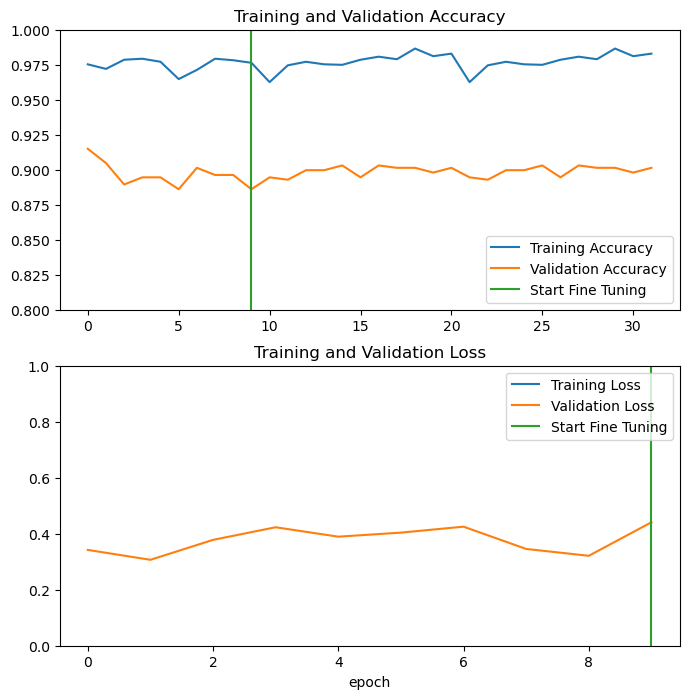

In [70]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [1]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

NameError: name 'test_dataset' is not defined